<a href="https://colab.research.google.com/github/glincow/sample-datascience-project/blob/main/Chapter7_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7:  Data Science

**This is a chapter in the book Minimal Python**

* [Buy a copy on LeanPub](https://leanpub.com/minimalpython)
* [Buy a copy from Amazon](https://www.amazon.com/Minimal-Python-efficient-programmer-onemillion2021-ebook/dp/B0855NSRR7)

[*Licensed Under Attribution-NonCommercial-ShareAlike 4.0*](https://creativecommons.org/licenses/by-nc-sa/4.0/)

![Minimal Python Book](https://d2sofvawe08yqg.cloudfront.net/minimalpython/hero?1582640276)

## Ingest

*COVID-19 Data from [New York Times Github](https://github.com/nytimes/covid-19-data)*

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Last five rows

In [4]:
df.tail()

,date,state,fips,cases,deaths
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485
61941,2023-03-23,Wyoming,56,185800,2014


*What are the columns?*

In [5]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

*What is the shape:  i.e. rows,columns?*

In [6]:
df.shape

(61942, 5)

## EDA

*What are general characteristics of the data?  A good way to find out is `df.describe`*

In [7]:
df.describe()

,fips,cases,deaths
count,61942.000000,6.194200e+04,61942.000000
mean,32.247958,8.898301e+05,11779.067499
std,18.788383,1.470231e+06,17345.774849
min,1.000000,1.000000e+00,0.000000
25%,17.000000,7.078350e+04,1171.000000
50%,31.000000,3.514960e+05,5035.000000
75%,46.000000,1.043231e+06,14912.000000
max,78.000000,1.216916e+07,104277.000000


*Cases and Deaths in the USA due to Covid-19*

<Axes: xlabel='cases', ylabel='deaths'>

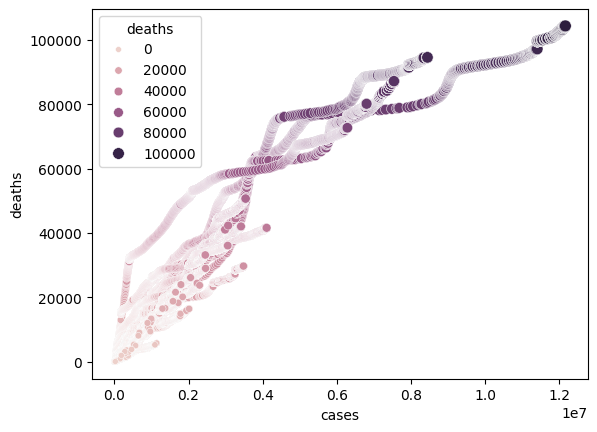

In [8]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths",
                hue="deaths",size="deaths", data=df)

### Date-based EDA

*Dealing with dates by setting index*

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23'],
              dtype='datetime64[ns]', name='date', length=61942, freq=None)

*Filter results by date range*

In [25]:
from datetime import date, timedelta
today = "2023-03-23"
daybefore = "2023-03-22"
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2023-03-23
Two days ago 2023-03-22


In [26]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2023-03-22,Alabama,1,1648385,21631
2023-03-22,Alaska,2,308893,1438
2023-03-22,American Samoa,60,8320,34
2023-03-22,Arizona,4,2451062,33190
2023-03-22,Arkansas,5,1008303,13068


*The distribution of the data by date*

<ipython-input-27-726bc3c8339e>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='deaths', ylabel='Density'>

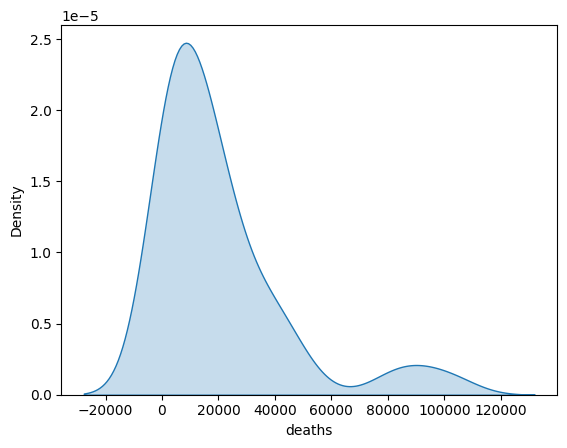

In [27]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

*Sort DataFrame in place by states with highest deaths and cases and show first 10 results*

In [28]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2023-03-23,California,6,12169158,104277
2023-03-22,California,6,12155467,104196
2023-03-23,Texas,48,8447168,94518
2023-03-22,Texas,48,8447168,94515
2023-03-22,Florida,12,7542869,87141
2023-03-23,Florida,12,7542869,87141
2023-03-22,New York,36,6803974,80138
2023-03-23,New York,36,6805271,80109
2023-03-22,Pennsylvania,42,3539135,50701


*There should be 50 states and District of Columbia*

In [29]:
current_df.shape

(112, 4)

### State Based Analysis

*Get 10 states and subset*

In [30]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['California',
 'California',
 'Texas',
 'Texas',
 'Florida',
 'Florida',
 'New York',
 'New York',
 'Pennsylvania',
 'Pennsylvania']

In [31]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

*Verify the unique states left is the same 10*

In [32]:
set(top_states_df.state.values)

{'California', 'Florida', 'New York', 'Pennsylvania', 'Texas'}

<Figure size 1500x500 with 0 Axes>

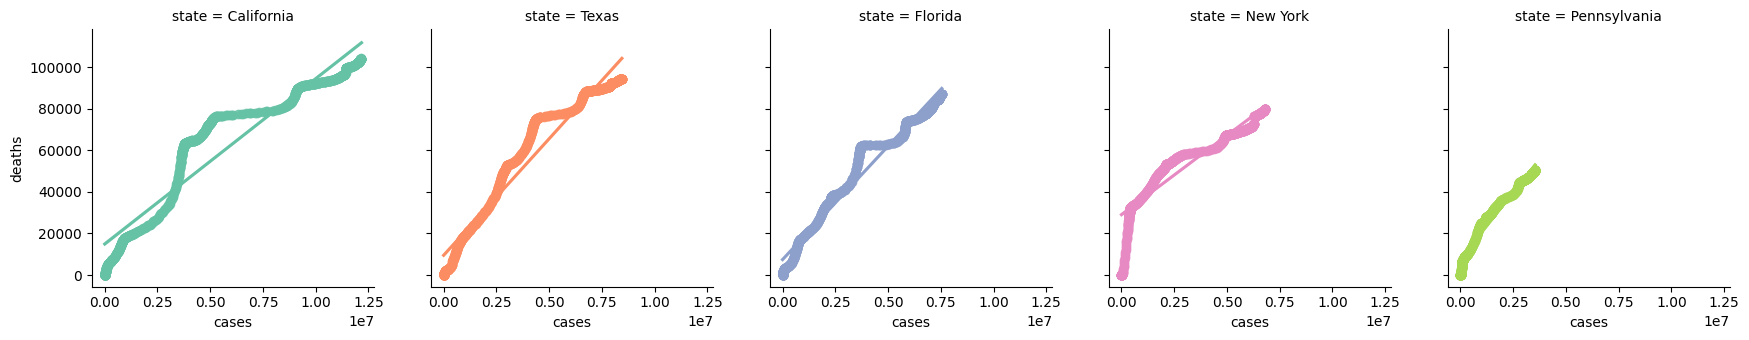

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state",
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

*Interactive plot of top states*

In [34]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-08,Pennsylvania,6,0
2020-03-09,Pennsylvania,10,0
2020-03-10,Pennsylvania,12,0
2020-03-11,Pennsylvania,16,0
2020-03-12,Pennsylvania,22,0


In [35]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_march_current_df, x=top_states_march_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

### Search for Features:  Political, Health and Finance

*Sugar Intake By State*

In [36]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])

cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
cdc_2013.head()

<ipython-input-36-5828ac7121d4>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


*Combine Sugar Data and Covid-19 Data*

In [37]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily
0,California,6,1,0,22.9
1,California,6,2,0,22.9
2,California,6,2,0,22.9
3,California,6,2,0,22.9
4,California,6,2,0,22.9


*What about data from the 2016 Election?*

In [38]:
election_df = pd.read_csv("https://raw.githubusercontent.com/paiml/minimal-python/master/data/2016-Electoral-Votes.csv")
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
election_df.head()
#election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
#election_df.head()

,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,0,1
1,Alaska,Republicans,0,1
2,Arizona,Republicans,0,1
3,Arkansas,Republicans,0,1
4,California,Democrats,1,0


In [39]:
sugar_covid_df = sugar_covid_df.merge(election_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily,Winning Party,Democrats,Republicans
0,California,6,1,0,22.9,Democrats,1,0
1,California,6,2,0,22.9,Democrats,1,0
2,California,6,2,0,22.9,Democrats,1,0
3,California,6,2,0,22.9,Democrats,1,0
4,California,6,2,0,22.9,Democrats,1,0


*Generate Heatmap*

In [40]:
sugar_covid_df.corr()

<ipython-input-40-b9664867f6da>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,fips,cases,deaths,employed-sugar-intake-daily,Democrats,Republicans
fips,1.000000,-0.120943,-0.127549,0.269999,-0.187330,0.187330
cases,-0.120943,1.000000,0.935557,-0.124204,0.221498,-0.221498
deaths,-0.127549,0.935557,1.000000,-0.161596,0.299948,-0.299948
employed-sugar-intake-daily,0.269999,-0.124204,-0.161596,1.000000,-0.767539,0.767539
Democrats,-0.187330,0.221498,0.299948,-0.767539,1.000000,-1.000000
Republicans,0.187330,-0.221498,-0.299948,0.767539,-1.000000,1.000000


In [41]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=sugar_covid_df.corr(),
                   x=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   y=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   hoverongaps = False))
fig.show()

<ipython-input-41-f364eda7fed2>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Modeling

## Conclusion
